# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Import & Load Data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy as sp
import numpy as np

In [15]:
plt.style.use('seaborn')

In [16]:
df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


# Describe Data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


The dataset has 332 rows of data and 15 columns (with 14 variables and index). There is no missing data. All data is numerical, and appears to be continuous except for 'chas' (a dummy variable indicating whether or not the property is on the Charles River). 

In [11]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

The columns appear not to contain any mistakes or problematic text - however, the descriptions are difficult to interpret and more descriptive headings should be considered. 

<IPython.core.display.Javascript object>


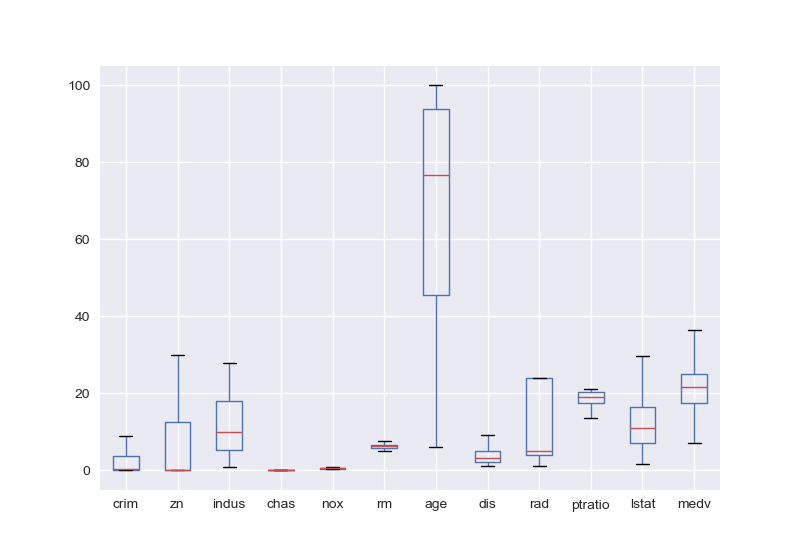

In [47]:
df.drop(['ID', 'tax', 'black'], axis=1).plot.box()

As the variables have not yet been standardized, excluding 'tax' and 'black' allowed the remaining variables to be plotted at a more interpretable scale. 'Crim', 'zn' and 'rad' are skewed and appear to contain outliers. 

In [46]:
df[['crim']].describe()

,crim
count,333.000000
mean,3.360341
std,7.352272
min,0.006320
25%,0.078960
50%,0.261690
75%,3.678220
max,73.534100


Outliers are visible on the box plot and also confirmed by the maximum value reaching 73 and median = 0.26. The mean = 3.3 is being skewed by a few extreme values (these likely represent neighborhoods where crime is exceptionally high). If these few neighborhoods are found to generally have different characteristcs from the majority of properties in the dataset, we might consider them to be a significantly different subset within the sample. 

In [101]:
df[['rad']].describe()

,rad
count,333.000000
mean,9.633634
std,8.742174
min,1.000000
25%,4.000000
50%,5.000000
75%,24.000000
max,24.000000


In [102]:
df.loc[df['rad']> 20].count()

ID         88
crim       88
zn         88
indus      88
chas       88
nox        88
rm         88
age        88
dis        88
rad        88
tax        88
ptratio    88
black      88
lstat      88
medv       88
dtype: int64

'Rad' (index of accessibility to radial highways) appears to be bimodal and to contain a subset of data that are removed from the majority of cases. It is unclear whether a larger RAD value indicates less or more accessibility. Increased accessibility may be indicative of less residential areas, so the relationship between 'rad' and 'tax' may help to clarify the metric used. Likewise, the relationship between 'rad' and 'indus' (the proportion of non-retail business acres per town) may also yield insights. 

<IPython.core.display.Javascript object>


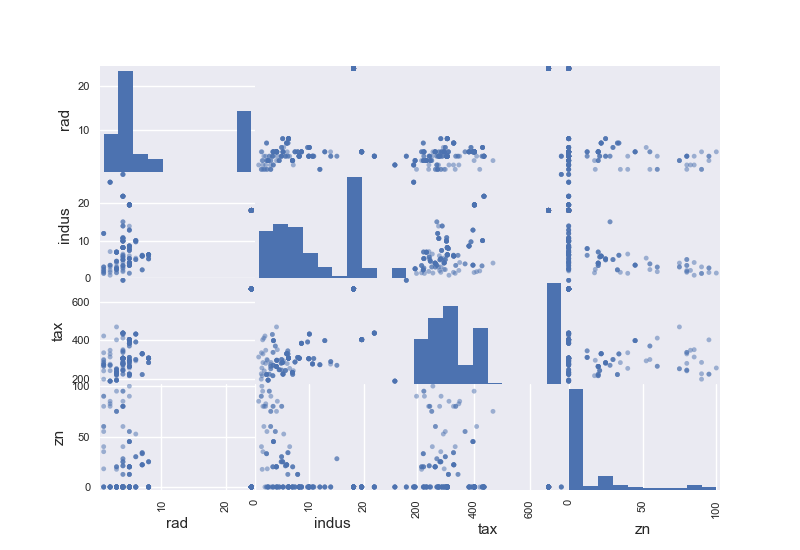

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C52A6BE48>,
      dtype=object)

In [58]:
pd.plotting.scatter_matrix(df[['rad','indus','tax', 'zn']])

Indeed, those values high in 'rad' are also some of those with the highest property tax values and perhaps those areas that are less residential (i.e., more businesses). Eighty-eight values fall above 20... it may be correct to assume that these 88 values represent less residential areas and cities. Further analysis will be carried out by splitting the dataset according to this value. 

In [91]:
df[['tax']].describe()

,tax
count,333.000000
mean,409.279279
std,170.841988
min,188.000000
25%,279.000000
50%,330.000000
75%,666.000000
max,711.000000


<IPython.core.display.Javascript object>


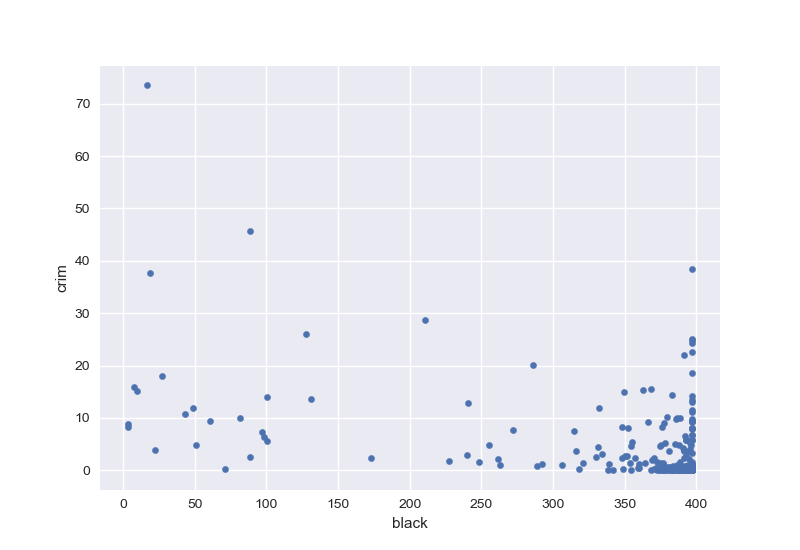

In [62]:
df.plot('black', 'crim', kind = 'scatter')

<IPython.core.display.Javascript object>


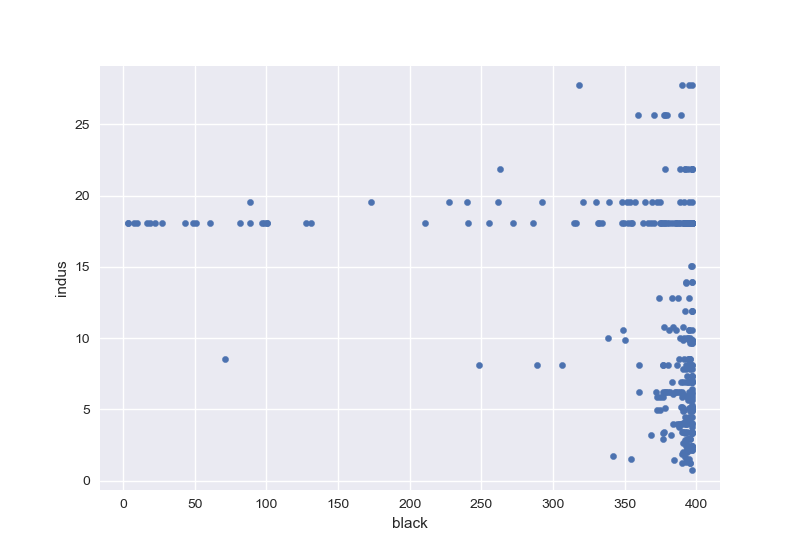

In [93]:
df.plot('black', 'indus', kind = 'scatter')

Cases low on 'black' correlate highly with crime and businesses; this likely indicates that these are cities that have more racial diversity than residential areas in this sample, and also more crime. 

# Explore

In this section, I will follow up my hypothesis that the dataset is comprised of cities and residential areas (suburbs) that are subsets of the total dataset (i.e., differ signficantly for several variables). 

In [103]:
cities = df.loc[df['rad'] > 20]
cities.head()
cities.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,88.000000,88.000000,88.0,8.800000e+01,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.0,8.800000e+01,88.000000,88.000000,88.000000
mean,425.715909,11.616404,0.0,1.810000e+01,0.056818,0.673875,5.922068,89.013636,2.134557,24.0,666.0,2.020000e+01,300.627386,18.358523,17.056818
std,40.093554,10.559032,0.0,2.501151e-14,0.232822,0.062266,0.687750,13.428766,0.634788,0.0,0.0,3.215766e-14,139.083412,6.928403,8.937443
min,357.000000,2.378570,0.0,1.810000e+01,0.000000,0.532000,3.561000,40.300000,1.129600,24.0,666.0,2.020000e+01,3.500000,2.960000,5.000000
25%,389.500000,5.404117,0.0,1.810000e+01,0.000000,0.631000,5.597250,84.225000,1.655525,24.0,666.0,2.020000e+01,251.552500,13.827500,11.650000
50%,431.000000,8.529685,0.0,1.810000e+01,0.000000,0.693000,6.113000,94.100000,2.034150,24.0,666.0,2.020000e+01,379.040000,17.665000,15.300000
75%,461.250000,13.620000,0.0,1.810000e+01,0.000000,0.713000,6.383750,98.725000,2.523725,24.0,666.0,2.020000e+01,396.382500,22.775000,20.300000
max,488.000000,73.534100,0.0,1.810000e+01,1.000000,0.770000,7.393000,100.000000,4.098300,24.0,666.0,2.020000e+01,396.900000,37.970000,50.000000


In [104]:
suburbs = df.loc[df['rad'] < 20]
suburbs.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,188.179592,0.394899,14.528571,8.848694,0.061224,0.515216,6.389016,60.760000,4.275783,4.473469,317.069388,17.818776,380.600000,10.416694,24.820408
std,119.173109,0.620201,25.368578,6.627684,0.240232,0.099592,0.669150,28.298794,1.995022,1.678062,86.062306,2.189911,40.078756,5.841032,8.368285
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,4.926000,6.000000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,8.100000
25%,89.000000,0.056600,0.000000,4.050000,0.000000,0.439000,5.963000,36.600000,2.596100,4.000000,264.000000,16.100000,383.610000,6.120000,19.400000
50%,177.000000,0.136420,0.000000,6.410000,0.000000,0.504000,6.249000,62.800000,3.945400,4.000000,304.000000,17.900000,392.800000,9.420000,22.900000
75%,273.000000,0.382140,21.000000,10.590000,0.000000,0.547000,6.726000,87.400000,5.560500,5.000000,384.000000,19.200000,396.240000,13.350000,28.100000
max,506.000000,3.321050,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,8.000000,711.000000,21.200000,396.900000,34.410000,50.000000


Comparing the descriptive statistics for the cities and suburbs datasets, it seems that separating the main dataset has created more homogenous subsets. 

<IPython.core.display.Javascript object>


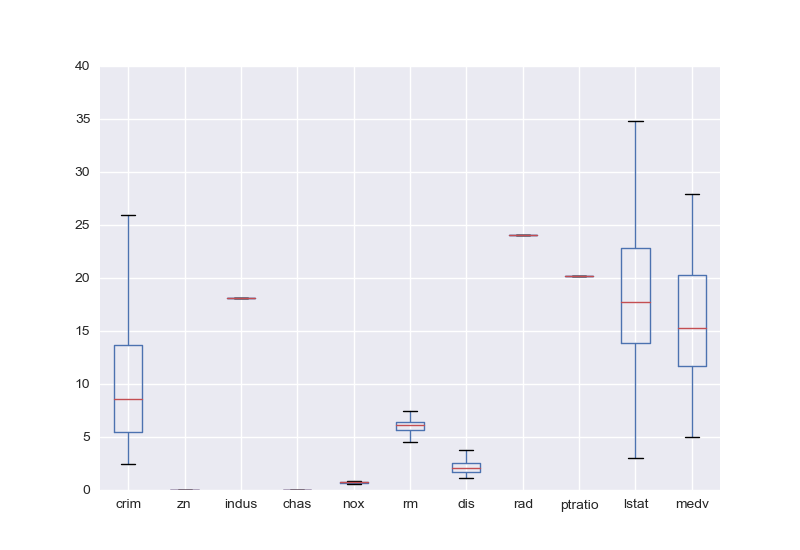

In [105]:
ax1 = cities.drop(['ID', 'black', 'tax', 'age'], axis=1)

ax1.plot.box()
plt.ylim(0, 40)
plt.show()

<IPython.core.display.Javascript object>


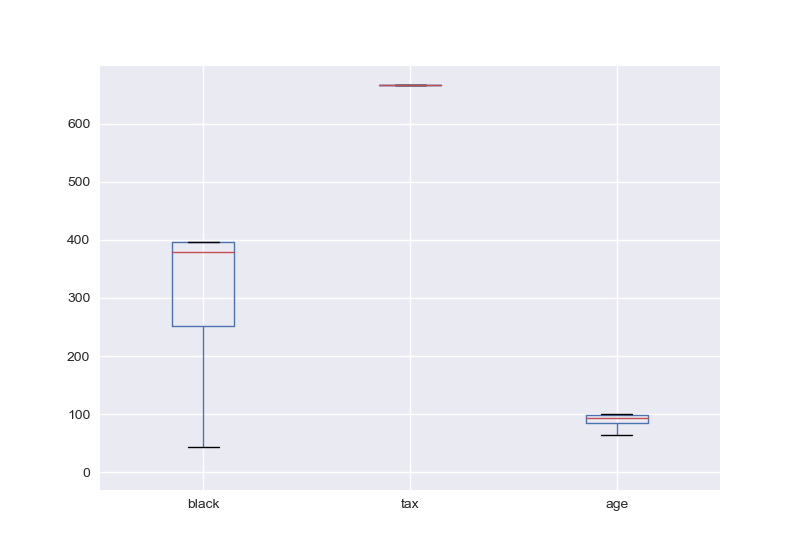

In [86]:
cities[['black', 'tax', 'age']].plot.box()

<IPython.core.display.Javascript object>


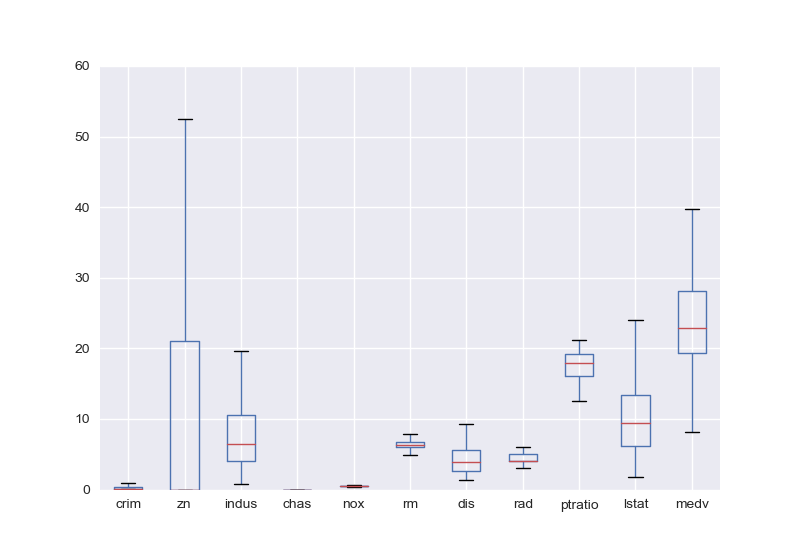

In [106]:
ax2 = suburbs.drop(['ID', 'black', 'tax', 'age'], axis=1)

ax2.plot.box()
plt.ylim(0, 60)
plt.show()

<IPython.core.display.Javascript object>


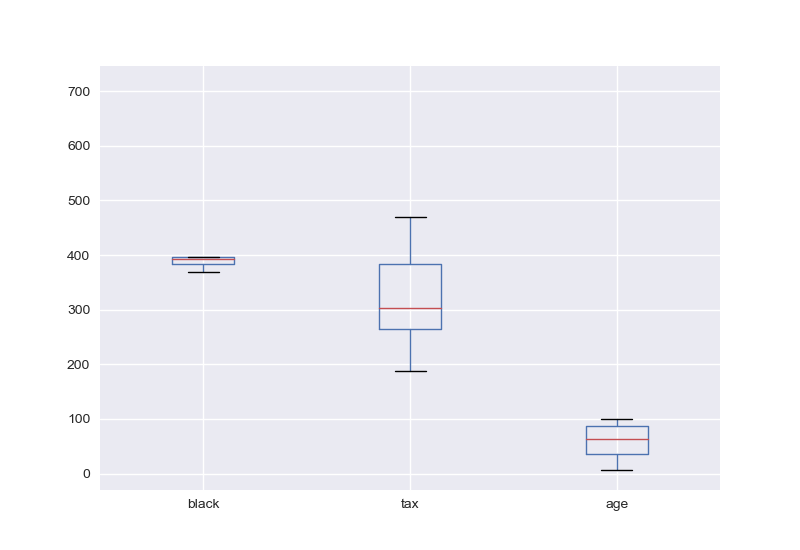

In [100]:
suburbs[['black', 'tax', 'age']].plot.box()

The boxplots above illustrate a few main findings:
1) Several variables appear to differ significantly between the two datasets (i.e., no overlapping range in values)
2) Separating the datasets has resulted in centralizing several of the distributions that were previously skewed  
    

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!